
<b><h1>What Areas Should the Agency Focus On?</h1></b>

The goal of this exercise is to do explore the data to find the answer to the Question 2 problem statement:

<b>Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?</b>

In this exercise, you will use 311 Dataset to determine whether to focus on any particular borough, ZIP code, or street (where the complaints are severe) for the specific Complaint Type you decided to focus at the end of the last exercise.

Add your answer to this question along with code and comments in a separate notebook. Upload the notebook in the subsection called "Question 2 - Should the Department of Housing Preservation and Development of New York City focus on any particular set of Boroughs or ZIP Code or Streets (where the complaints are severe) for the specific type of Complaints you identified in response to Question 1"  in the section "Submit your work and Review your Peer's work" in the module "Submit Your Work and Grade Your Peers".


In [11]:
#IMPORT THE LIBRARIES

import pandas as pd
import matplotlib.pylab as plt

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import os

In [12]:


#FUNCTIONS DEFINED TO UPLOAD/DOWNLOAD TO OBJECT STORE

from ibm_botocore.client import Config
import ibm_boto3
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded : ' + local_file_name)

from ibm_botocore.client import Config
import ibm_boto3

def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')



<b>Step 2</b> : Download and Clense the Data

In [14]:
#DOWNLOAD THE 311 FILE USING THE DEFINED FUNCTIONS ABOVE
download_file_cos(credentials,'311_ALL.pkl','311_ALL.pkl')

#READ IN THE PICKLE FILE THAT WAS DOWNLOADED
df_311 = pd.read_pickle('311_ALL.pkl')

#CONVERT EVERYTHING TO UPPERCASE AND REMOVE ANY POSSIBLE SPACES IN FRONT OR BACK OF THE DATA
df_311['complaint_type'] = df_311['complaint_type'].str.upper() 
df_311['complaint_type'] = df_311['complaint_type'].str.strip()

df_311['incident_address'] = df_311['incident_address'].str.upper() 
df_311['incident_address'] = df_311['incident_address'].str.strip()

df_311['city'] = df_311['city'].str.upper() 
df_311['city'] = df_311['city'].str.strip()

#MAKE SURE THAT THE COMPLAINT_TYPES ALL MATCH. PAINT/PLASTER AND PAINT - PLASTER ARE THE SAME THING, SO WE WILL MAKE THEM A SINGLE CATAGORICAL VALUE
df_311['complaint_type'] = df_311['complaint_type'].str.replace('PAINT/PLASTER','PAINT - PLASTER')

#FIX THE ZIP CODES WHICH ARE FLOATS
df_311.incident_zip = df_311.incident_zip.fillna(0)
df_311.incident_zip = df_311.incident_zip.astype(int)

File Downloaded


In [15]:
#ADD A COUNT COLUMN
df_311['count'] = 1

<b>Step 3</b> : Start the analysis. We are going to assume that duplicate calls will help us make people "happier" when resolved, so we will includ them in the analysis. HEAT/HOT WATER has the highest number of complaints (with duplicates) and the second highest with non-duplicates, so we will go with that one.

In [19]:
#DEBUG TO VIEW THE DATA
#df_311.head(4)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status,count
0,2019-09-28T11:49:21.000,43915077,PAINT - PLASTER,11385,1711 HIMROD STREET,HIMROD STREET,ADDRESS,RIDGEWOOD,The following complaint conditions are still o...,QUEENS,40.705446,-73.914524,NaN,RESIDENTIAL BUILDING,Open,1
1,2019-09-28T19:43:42.000,43915957,APPLIANCE,10458,2700 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.867269,-73.893454,NaN,RESIDENTIAL BUILDING,Open,1
2,2019-09-28T13:55:54.000,43914291,HEAT/HOT WATER,11417,86-07 SUTTER AVENUE,SUTTER AVENUE,ADDRESS,OZONE PARK,The complaint you filed is a duplicate of a co...,QUEENS,40.675885,-73.850473,NaN,RESIDENTIAL BUILDING,Open,1
3,2019-09-28T05:58:43.000,43915680,HEAT/HOT WATER,10002,575 GRAND STREET,GRAND STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.713707,-73.979140,NaN,RESIDENTIAL BUILDING,Open,1
4,2019-09-28T16:14:09.000,43914296,HEAT/HOT WATER,11233,1711 FULTON STREET,FULTON STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.679340,-73.930435,NaN,RESIDENTIAL BUILDING,Open,1
5,2019-09-21T19:32:32.000,43859586,UNSANITARY CONDITION,10458,2630 MARION AVENUE,MARION AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.864302,-73.891116,NaN,RESIDENTIAL BUILDING,Open,1
6,2019-09-28T21:11:04.000,43915372,UNSANITARY CONDITION,10452,185 WEST 170 STREET,WEST 170 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.841933,-73.925834,NaN,RESIDENTIAL BUILDING,Open,1
7,2019-09-28T12:28:11.000,43914314,SAFETY,10032,38 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.836707,-73.944433,NaN,RESIDENTIAL BUILDING,Open,1
8,2019-09-28T10:23:09.000,43915728,WATER LEAK,10452,1115 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.834637,-73.924299,NaN,RESIDENTIAL BUILDING,Open,1
9,2019-09-28T18:04:33.000,43915433,FLOORING/STAIRS,10031,3481 BROADWAY,BROADWAY,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.824609,-73.951793,NaN,RESIDENTIAL BUILDING,Open,1


In [21]:
#FILTER OUT ONLY THE HEAT/HOT WATER SINCE WE DECIDED TO ONLY FOCUS ON THIS PER THE DIRECTIONS
df_311_Heat = df_311[df_311['complaint_type'].str.contains("HEAT/HOT WATER")]

In [24]:
df_311_Heat_borough_group = df_311_Heat.groupby(['borough']).count()['count']

In [28]:
df_311_Heat_borough_group = df_311_Heat_borough_group.reset_index()

In [29]:
df_311_Heat_borough_group.sort_values(by=['count'])

,borough,count
5,Unspecified,1
4,STATEN ISLAND,11404
3,QUEENS,152643
2,MANHATTAN,261027
1,BROOKLYN,352841
0,BRONX,374676


In [30]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [31]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


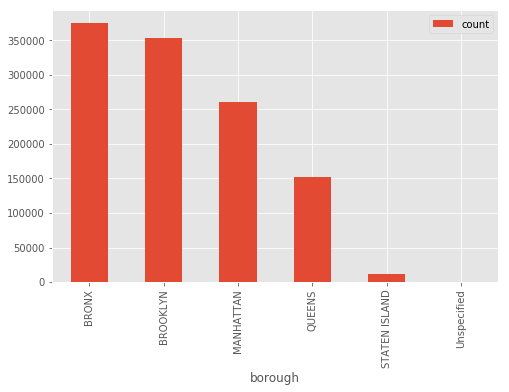

In [46]:
#JUST FOR FUN, LET'S PLOT IT
df_311_Heat_borough_group.plot(kind="bar", x='borough', y='count',figsize=(8, 5))
plt.show()

From the surface, it looks like the Bronx and Brooklyn have the most calls. However, you could still have a zip code that might be an issue outside of the top two.

In [56]:
df_311_Heat_zipcode_group = df_311_Heat.groupby(['incident_zip', 'borough']).count()['count']

In [57]:
df_311_Heat_zipcode_group = df_311_Heat_zipcode_group.reset_index()

In [59]:
df_311_Heat_zipcode_group.sort_values(by=['count'], ascending = False).head(10)

,incident_zip,borough,count
131,11226,BROOKLYN,38238
76,10458,BRONX,35722
87,10467,BRONX,34769
88,10468,BRONX,31339
71,10453,BRONX,31300
70,10452,BRONX,25764
33,10031,MANHATTAN,25057
75,10457,BRONX,24721
74,10456,BRONX,23687
80,10462,BRONX,23460


You can see above, the zipcode 10031 actually has a pretty significant amount of calls. However, it would still be optimal to look into the Bronx area for Heating/Water issues. Let's take it a step furthure and see if there are any addresses in certain areas that have high volume.

In [60]:
df_311_Heat_address_group = df_311_Heat.groupby(['incident_zip', 'borough', 'incident_address']).count()['count']

In [62]:
df_311_Heat_address_group = df_311_Heat_address_group.reset_index()

In [63]:
df_311_Heat_address_group.sort_values(by=['count'], ascending = False).head(10)

,incident_zip,borough,incident_address,count
83967,11373,QUEENS,89-21 ELMHURST AVENUE,9437
41689,10472,BRONX,1025 BOYNTON AVENUE,5208
21348,10040,MANHATTAN,34 ARDEN STREET,4919
54319,11209,BROOKLYN,9511 SHORE ROAD,3969
35192,10462,BRONX,2090 EAST TREMONT AVENUE,3566
72493,11233,BROOKLYN,1711 FULTON STREET,2364
31762,10458,BRONX,2968 PERRY AVENUE,2295
25806,10451,BRONX,888 GRAND CONCOURSE,2224
26243,10452,BRONX,1425 DR M L KING JR BOULEVARD,2166
31512,10458,BRONX,266 BEDFORD PARK BOULEVARD,2131


It looks like there is an area in Queens that has major issues!


<b>Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?</b>

The Answer:

Generally, the Bronx and Brooklyn have the most calls for HEAT/HOT WATER and these would be the areas to generally look into. However, you can focus on zipcode 10031 in Manhattan, and hyperfocus on 89-21 ELMHURST AVENUE in Queens.